In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from prepare import prepare
import numpy as np
import seaborn as sns

# Stats
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.stats import levene

import warnings
warnings.filterwarnings("ignore")

In [171]:
df = pd.read_csv('final_10.csv')

In [173]:
df = df.drop(columns=['Unnamed: 0'])

In [180]:
df.time_cutoff.value_counts()

10.0    4863
Name: time_cutoff, dtype: int64

In [175]:
len(df)

4863

In [176]:
df.reset_index(inplace = True)

In [177]:
train, test = prepare(df)

## Original Hypothesis

    The biggest driver for predicting win rates will be the data on 'TeamWards'.

# Question # 1

    Is the average winning TeamWards different from the average TeamWards for the defeated team?

### Setting up seperate dataframes for blue_wins and red_wins

In [181]:
# Blue Winning Team DF
blue_win = train[train['winningTeam'] == 100]

In [182]:
# checking number of values in each
len(blue_win)

1873

### Checking TeamWards Mean

In [183]:
# When blue won, what was blues avg ward score?
blue_mean = blue_win.BlueTeamWards.mean()
blue_mean

23.236518953550455

In [184]:
# When blue won, what was reds avg ward score?
red_mean = blue_win.RedTeamWards.mean()
red_mean

23.11959423384944

### Graph

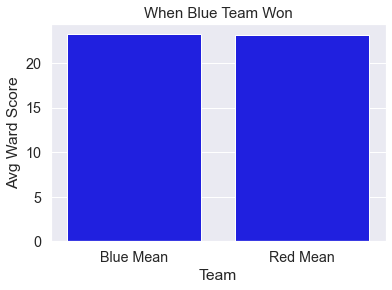

In [185]:
# Graphing the average altitude by ratings
x = ['Blue Mean', 'Red Mean']
y = [blue_mean, red_mean]
ax = sns.barplot(x, y, color='blue')

ax.set_title('When Blue Team Won', fontsize = 15)
sns.set(font_scale = 1.3)
ax.set(xlabel='Team', ylabel='Avg Ward Score')
plt.show()

### Question 1 Takeaway

    - When Blue Team won avg ward scores were pretty even.
    - I don't believe this feature will be useful in our model.  I will still try to feed TeamWards into my model and I will document the results.  I dont anticipate it to perform well.
    - I will not be running a Hypothesis Test since I dont believe TeamWards will be a driver of predicting win rates

# Question # 2

    There is difference in BlueTeamTowersLost from RedTeamTowersLost

### Checking Towers Lost Mean

In [186]:
# What is blues team towers lost mean?
blue_mean = blue_win.towers_lost_team100.mean()
blue_mean

0.01868659903897491

In [187]:
# What is reds team towers lost mean?
red_mean = blue_win.towers_lost_team200.mean()
red_mean

0.022423918846769888

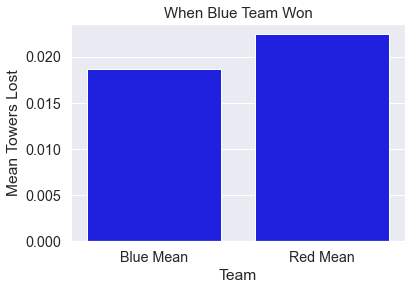

In [188]:
# Graphing the average towers lost when red won
x = ['Blue Mean', 'Red Mean']
y = [blue_mean, red_mean]
ax = sns.barplot(x, y, color='blue')

ax.set_title('When Blue Team Won', fontsize = 15)
sns.set(font_scale = 1.3)
ax.set(xlabel='Team', ylabel='Mean Towers Lost')
plt.show()

### Question 1 at a glance

    - Red Team loses more towers on avg than blue team

### Hypothesis Test
    Running a hypothesis test to make sure the results didn't happen by accident

### Significance Level

In [189]:
# A significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference.
alpha = .05

### Checking Assumptions

    - Independent
    - Normally Distributed
    - Equal Variances

### Independent?
    Yes, I seperated Avg Towers by red and blue team. 

### Normally Distributed?
    No, Take a Look at the graphs below.

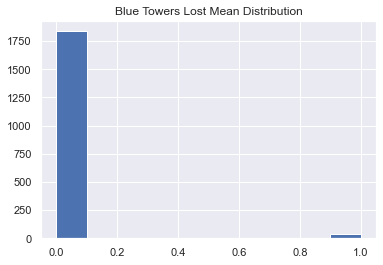

In [190]:
# Graphing Blue Towers Lost mean distribution
sns.set(font_scale = 1)
blue_win.towers_lost_team100.hist()
plt.title('Blue Towers Lost Mean Distribution')
plt.show()

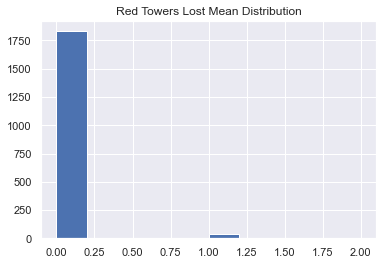

In [191]:
# Graphing Red Towers Lost mean distribution
blue_win.towers_lost_team200.hist()
plt.title('Red Towers Lost Mean Distribution')
plt.show()

### Equal Variances?
    - The leven test concluded the populations DID have equal variances.

In [192]:
# From the scypi stats library, im going to use the levene test to check variance.
# It will test the null hypothesis that all input samples are from populations with equal variances.
stats, p = levene(blue_win.towers_lost_team100, blue_win.towers_lost_team200)
stats, p

(0.6327028928527081, 0.42641602902025977)

## A small p-value suggests that the populations do not have equal variances.

In [193]:
if p < alpha:
    print("populations do not have equal variances")
else:
    print("populations do have equal variances")

populations do have equal variances


### Mann-Whitney's Test
    Assumptions were not met.  I will use a Non-Parametric Test.

### Hypothesis

### $H_0$: There is no difference in BlueTeamTowersLost from RedTeamTowersLost.
### $H_a$: There is difference in BlueTeamTowersLost from RedTeamTowersLost

In [194]:
# From stats library using the mannwhitneyu, returning a stats and p value
stat, p = mannwhitneyu(blue_win.towers_lost_team100, blue_win.towers_lost_team200)
stat, p

if p < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject the Null Hypothesis")

Fail to Reject the Null Hypothesis


### Hypotheis Results
    - There IS a difference in BlueTeamTowersLost from RedTeamTowersLost

### Question 1 Takeway
    - I have a 95% confidence level that there is a difference in BlueTeamTowersLost from RedTeamTowersLost  
    - When Blue Team wins, RedTeamsTowerLost is more than Blue
    - towers_lost_team100 seems to be a good fit or useful for modeling.  I will include it in my models and see if this is true. 

In [195]:
blue_win.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1873 entries, 3532 to 3582
Data columns (total 230 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    index                                  int64  
 1    airdragon_team100                      float64
 2    assistsplayer_1                        float64
 3    assistsplayer_10                       float64
 4    assistsplayer_2                        float64
 5    assistsplayer_3                        float64
 6    assistsplayer_4                        float64
 7    assistsplayer_5                        float64
 8    assistsplayer_6                        float64
 9    assistsplayer_7                        float64
 10   assistsplayer_8                        float64
 11   assistsplayer_9                        float64
 12   baron_team100                          float64
 13   chemtechdragon_team100                 float64
 14   currentGold_1                      

# Gold Per Sec

In [196]:
blue_mean = blue_win.BlueTeamGoldPerSec.mean()
red_mean = blue_win.RedTeamGoldPerSec.mean()

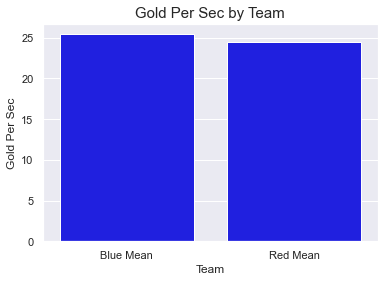

In [197]:
# Graphing the average towers lost when red won
x = ['Blue Mean', 'Red Mean']
y = [blue_mean, red_mean]
ax = sns.barplot(x, y, color='blue')

ax.set_title('Gold Per Sec by Team', fontsize = 15)
sns.set(font_scale = 1.3)
ax.set(xlabel='Team', ylabel='Gold Per Sec')
plt.show()

# Total Gold

In [198]:
blue_mean = blue_win.BlueTeamTotalGold.mean()
red_mean = blue_win.RedTeamTotalGold.mean()

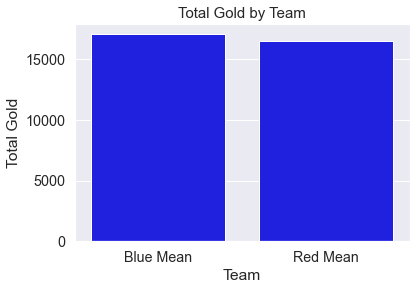

In [199]:
# Graphing the average towers lost when red won
x = ['Blue Mean', 'Red Mean']
y = [blue_mean, red_mean]
ax = sns.barplot(x, y, color='blue')

ax.set_title('Total Gold by Team', fontsize = 15)
sns.set(font_scale = 1.3)
ax.set(xlabel='Team', ylabel='Total Gold')
plt.show()

# Gold Difference

In [200]:
blue_win.BlueTeamTotalGoldDifference.median()

629.0

In [201]:
blue_win.BlueTeamTotalGoldDifference.mean()

587.2231713828083

# Game Duration

In [202]:
train.gameDuration.min()

1500

In [203]:
round(train.gameDuration.mean(), 1), round(train.gameDuration.mean()/2,1)

(1907.1, 953.6)

In [204]:
train.gameDuration.median(), train.gameDuration.median()/2

(1858.0, 929.0)

In [ ]:
# Going deeper 

In [210]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3890 entries, 3513 to 3582
Data columns (total 230 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    index                                  int64  
 1    airdragon_team100                      float64
 2    assistsplayer_1                        float64
 3    assistsplayer_10                       float64
 4    assistsplayer_2                        float64
 5    assistsplayer_3                        float64
 6    assistsplayer_4                        float64
 7    assistsplayer_5                        float64
 8    assistsplayer_6                        float64
 9    assistsplayer_7                        float64
 10   assistsplayer_8                        float64
 11   assistsplayer_9                        float64
 12   baron_team100                          float64
 13   chemtechdragon_team100                 float64
 14   currentGold_1                      

In [ ]:
# towers_lost_team100 
# towers_lost_team200

In [224]:
train[train.towers_lost_team200 > 0].winningTeam.value_counts()

100.0    41
200.0    26
Name: winningTeam, dtype: int64

In [226]:
train[train.towers_lost_team200 > 0]

,index,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,...,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,BlueTeamTotalGoldDifference,RedTeamTotalGoldDifference,BlueTeamMVPKills,RedTeamMVPKills
3532,3532,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,...,19,14,5,3,21106,17694,4519,-4519,4.0,1.0
1071,1071,0.0,1.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,...,14,27,4,2,18518,17795,2387,-2387,2.0,1.0
2330,2330,1.0,0.0,5.0,2.0,3.0,4.0,1.0,0.0,2.0,...,18,18,10,11,16781,17452,-1235,1235,4.0,6.0
1898,1898,0.0,3.0,4.0,1.0,1.0,1.0,1.0,2.0,1.0,...,12,9,7,12,17111,17218,-626,626,4.0,3.0
2077,2077,0.0,2.0,1.0,0.0,0.0,0.0,8.0,0.0,0.0,...,293,17,10,3,17011,17872,1416,-1416,7.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,2289,0.0,1.0,1.0,2.0,2.0,0.0,3.0,3.0,1.0,...,12,16,8,7,20310,15719,3958,-3958,4.0,3.0
293,293,0.0,3.0,2.0,1.0,6.0,0.0,4.0,2.0,1.0,...,84,12,14,7,18288,17539,382,-382,5.0,3.0
2843,2843,0.0,3.0,2.0,4.0,1.0,2.0,10.0,2.0,2.0,...,15,12,20,10,17124,13234,6706,-6706,6.0,2.0
4293,4293,0.0,2.0,6.0,4.0,2.0,2.0,2.0,2.0,2.0,...,13,16,12,12,16860,16164,1282,-1282,6.0,4.0


In [225]:
41/(41+26)

0.6119402985074627

In [223]:
60/(35+60)

0.631578947368421

# Rift Herald

In [228]:
train.riftherald_team100.value_counts()

0.0    3396
1.0     494
Name: riftherald_team100, dtype: int64

In [229]:
train.riftherald_team200.value_counts()

0.0    3468
1.0     422
Name: riftherald_team200, dtype: int64

In [234]:
rift = train[train.riftherald_team100 == 1]

In [238]:
len(rift)

494

In [235]:
rift

,index,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,...,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,BlueTeamTotalGoldDifference,RedTeamTotalGoldDifference,BlueTeamMVPKills,RedTeamMVPKills
1250,1250,0.0,1.0,0.0,0.0,3.0,0.0,5.0,0.0,3.0,...,14,12,9,5,18575,16532,1327,-1327,3.0,3.0
3532,3532,0.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,...,19,14,5,3,21106,17694,4519,-4519,4.0,1.0
920,920,0.0,5.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,17,15,8,2,19899,18142,3808,-3808,4.0,1.0
1366,1366,0.0,0.0,0.0,0.0,3.0,0.0,1.0,1.0,0.0,...,15,32,4,3,16794,17847,-478,478,3.0,2.0
92,92,0.0,0.0,8.0,4.0,0.0,2.0,4.0,2.0,1.0,...,16,12,10,13,16302,18512,-1555,1555,3.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,4043,0.0,0.0,1.0,3.0,2.0,5.0,1.0,4.0,3.0,...,15,18,11,10,16803,15798,1676,-1676,3.0,2.0
3316,3316,0.0,0.0,5.0,5.0,1.0,1.0,2.0,0.0,0.0,...,53,104,9,11,18827,17303,1364,-1364,4.0,5.0
826,826,0.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,2.0,...,15,20,2,9,18515,17889,-1538,1538,2.0,4.0
2428,2428,0.0,2.0,3.0,0.0,2.0,7.0,7.0,2.0,1.0,...,29,174,18,11,17892,17344,2184,-2184,9.0,4.0


1 Top
2 jungle
3 mid
4 bot
5 support

6 Top
7 Jungle
8 Mid
9 Bot
10 support

In [243]:
# Where Blue top had more kills than Red Team
rift[rift.killsplayer_1 > rift.killsplayer_6][['killsplayer_1','killsplayer_6']].head(3)

,killsplayer_1,killsplayer_6
1250,1.0,0.0
3532,4.0,1.0
1366,3.0,1.0


In [246]:
# Where Blue Top had equal kills than Red Top
rift[rift.killsplayer_1 == rift.killsplayer_6][['killsplayer_1','killsplayer_6']].head(3)

,killsplayer_1,killsplayer_6
920,0.0,0.0
2471,1.0,1.0
1054,2.0,2.0


In [245]:
# Where Blue Top had less kills than Red Top
rift[rift.killsplayer_1 < rift.killsplayer_6][['killsplayer_1','killsplayer_6']].head(3)

,killsplayer_1,killsplayer_6
4565,1.0,2.0
559,1.0,2.0
3037,1.0,3.0


    1 Top
    2 jungle 
    3 mid 
    4 bot 
    5 support
    
    6 Top
    7 Jungle
    8 Mid
    9 Bot
    10 support

In [ ]:
# Where Blue Top had less kills than Red Top
rift[rift.killsplayer_2 > rift.killsplayer_7][['killsplayer_2','killsplayer_7']]

In [250]:
# Where Blue Top had less kills than Red Top
rift[rift.killsplayer_2 == rift.killsplayer_7][['killsplayer_2','killsplayer_7']]

,killsplayer_2,killsplayer_7
3532,1.0,1.0
1366,2.0,2.0
1071,0.0,0.0
3546,0.0,0.0
1054,1.0,1.0
...,...,...
4855,0.0,0.0
1510,1.0,1.0
3687,0.0,0.0
4043,1.0,1.0


In [251]:
# Where Blue Top had less kills than Red Top
rift[rift.killsplayer_2 < rift.killsplayer_7][['killsplayer_2','killsplayer_7']]

,killsplayer_2,killsplayer_7
92,2.0,4.0
3957,0.0,3.0
2134,0.0,1.0
1280,3.0,4.0
3551,2.0,3.0
...,...,...
2863,0.0,1.0
1246,1.0,2.0
1513,1.0,3.0
826,1.0,3.0


### Checking for both now

In [266]:
# When Top and jungle kills is more than counterparts
rift[(rift.killsplayer_1 > rift.killsplayer_6) & (rift.killsplayer_2 > rift.killsplayer_7)].head()

,index,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,...,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,BlueTeamTotalGoldDifference,RedTeamTotalGoldDifference,BlueTeamMVPKills,RedTeamMVPKills
1250,1250,0.0,1.0,0.0,0.0,3.0,0.0,5.0,0.0,3.0,...,14,12,9,5,18575,16532,1327,-1327,3.0,3.0
1409,1409,0.0,0.0,2.0,0.0,0.0,2.0,2.0,2.0,1.0,...,154,16,4,6,17768,17821,-931,931,3.0,5.0
2416,2416,0.0,0.0,0.0,2.0,0.0,0.0,3.0,3.0,2.0,...,20,15,5,6,18468,18005,435,-435,3.0,2.0
2889,2889,0.0,1.0,2.0,1.0,1.0,1.0,1.0,0.0,2.0,...,15,18,5,6,19414,17421,972,-972,3.0,2.0
2330,2330,1.0,0.0,5.0,2.0,3.0,4.0,1.0,0.0,2.0,...,18,18,10,11,16781,17452,-1235,1235,4.0,6.0


In [267]:
# Checking when kills are equal for top and jungle counterparts
rift[(rift.killsplayer_1 == rift.killsplayer_6) & (rift.killsplayer_2 == rift.killsplayer_7)].head()

,index,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,...,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,BlueTeamTotalGoldDifference,RedTeamTotalGoldDifference,BlueTeamMVPKills,RedTeamMVPKills
1054,1054,0.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,1.0,...,15,41,6,12,17993,18957,-1951,1951,2.0,2.0
4409,4409,0.0,0.0,3.0,1.0,2.0,0.0,1.0,0.0,1.0,...,15,52,4,5,18836,18116,1742,-1742,1.0,2.0
2723,2723,0.0,2.0,1.0,0.0,2.0,0.0,3.0,0.0,2.0,...,15,16,7,4,18670,17068,2911,-2911,3.0,2.0
3177,3177,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,1.0,...,22,13,2,7,18208,19187,-1973,1973,1.0,2.0
3019,3019,0.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,0.0,...,145,17,5,1,18743,17626,994,-994,2.0,1.0


In [268]:
# Check when top has less kills and Jungle has less kills comparted to counterparts
rift[(rift.killsplayer_1 < rift.killsplayer_6) & (rift.killsplayer_2 < rift.killsplayer_7)].head()

,index,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,...,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,BlueTeamTotalGoldDifference,RedTeamTotalGoldDifference,BlueTeamMVPKills,RedTeamMVPKills
2134,2134,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,...,11,18,3,6,16543,17594,-831,831,2.0,4.0
2525,2525,0.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,3.0,...,17,14,2,10,16461,17193,-1388,1388,3.0,3.0
1208,1208,0.0,0.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,...,16,23,8,13,16855,18354,-2800,2800,3.0,4.0
2277,2277,0.0,0.0,7.0,0.0,0.0,3.0,2.0,0.0,1.0,...,16,13,5,13,18511,19572,-2008,2008,4.0,5.0
586,586,0.0,1.0,5.0,0.0,1.0,5.0,5.0,0.0,0.0,...,14,14,12,10,18893,17922,1346,-1346,4.0,7.0


In [262]:
# Check when top has more kills and Jungle has less kills 
rift[(rift.killsplayer_1 > rift.killsplayer_6) & (rift.killsplayer_2 < rift.killsplayer_7)].head()

,index,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,...,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,BlueTeamTotalGoldDifference,RedTeamTotalGoldDifference,BlueTeamMVPKills,RedTeamMVPKills
92,92,0.0,0.0,8.0,4.0,0.0,2.0,4.0,2.0,1.0,...,16,12,10,13,16302,18512,-1555,1555,3.0,6.0
3957,3957,0.0,0.0,6.0,1.0,0.0,1.0,1.0,2.0,1.0,...,10,12,3,11,17716,18714,-738,738,3.0,6.0
1785,1785,0.0,0.0,3.0,5.0,0.0,0.0,2.0,1.0,3.0,...,14,155,7,11,20370,17512,2967,-2967,3.0,3.0
3416,3416,0.0,1.0,4.0,4.0,0.0,1.0,2.0,1.0,1.0,...,14,38,8,11,18464,16592,737,-737,5.0,6.0
2774,2774,0.0,1.0,4.0,2.0,0.0,0.0,0.0,1.0,1.0,...,71,17,3,8,18204,18703,-926,926,5.0,4.0


In [265]:
# Checking when Top has less kills and Jungle has more
rift[(rift.killsplayer_1 < rift.killsplayer_6) & (rift.killsplayer_2 > rift.killsplayer_7)].head()

,index,airdragon_team100,assistsplayer_1,assistsplayer_10,assistsplayer_2,assistsplayer_3,assistsplayer_4,assistsplayer_5,assistsplayer_6,assistsplayer_7,...,BlueTeamWards,RedTeamWards,BlueTeamAssists,RedTeamAssists,BlueTeamXp,RedTeamXp,BlueTeamTotalGoldDifference,RedTeamTotalGoldDifference,BlueTeamMVPKills,RedTeamMVPKills
4565,4565,0.0,3.0,3.0,1.0,1.0,1.0,4.0,1.0,0.0,...,15,14,10,6,18252,18602,-3307,3307,3.0,4.0
3037,3037,1.0,2.0,2.0,2.0,2.0,0.0,2.0,0.0,2.0,...,10,15,8,9,18519,19490,-380,380,4.0,5.0
878,878,0.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,...,12,23,3,5,16171,17173,-1886,1886,2.0,4.0
564,564,1.0,3.0,1.0,4.0,4.0,3.0,3.0,2.0,1.0,...,11,15,17,6,18571,17667,1307,-1307,3.0,2.0
452,452,0.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0,...,43,92,5,6,19272,18232,606,-606,2.0,2.0


In [280]:
# Where Blue top had more xp than Red Team
rift[(rift.xp_1 < rift.xp_6) & (rift.xp_2 < rift.xp_7)][['xp_2','xp_7']]

,xp_2,xp_7
1054,4134.0,4652.0
3037,3390.0,3940.0
3957,3275.0,3822.0
3551,3120.0,3876.0
1208,3166.0,3798.0
...,...,...
744,3693.0,4296.0
3465,3173.0,3648.0
4855,3022.0,3624.0
1246,2368.0,3458.0


### When Blue takes Herald 

    - 494 Total Where Blue Took Herald
    
    KILLs
    
        Top Laner Kills Stats

            - 211 Games, When blue top had more kills than red top
            - 139 Games, When Blue top had same amount of kills than red Top
            - 144 Games, When Blue Top had less kills than Red Top

        Jungle Laner Kills Stats

            - 204 Games, Where Blue Jungle had more kills than Red Jungle
            - 120 Games, Where Blue Jungle had equal kills than Red Jungle
            - 170 Games, Where Blue Jungle had less kills than Red Jungle

        Top and Jungle Kills Stats

            - 80 Games, Where Top and Jungle had more kills than there counterparts
            - 32 Games, Where Top and Jungle had equal kills than there counterparts
            - 48 Games, Where Top and Jungle had less kills than there counterparts

            - 72 Games, Where Top had more kills but jungle had less than counterparts
            - 67 Games, Where Top had less kills but jungle had more than counterparts
    
    XP
    
        Top Laner XP Stats
            - 301 Games, When blue Top had more xp than Red Top
            - 193 Games, When blue Top had less xp than Red Top
        
        Jungle Laner XP Stats
            - 283 Games, When Blue Jungle had more xp than Red Top
            - 211 Games, When Blue Jungle had less xp than Red Top
        
        Top and Jungle Kills Stats

            - 156 Games, Where Top and Jungle had more xp than there counterparts
            - 66 Games, Where Top and Jungle had less xp than there counterparts

            - 145 Games, Where Top had more xp but jungle had less than counterparts
            - 127 Games, Where Top had less xp but jungle had more than counterparts
            
    

# Herald Takeaways
    - Top laner had more impact on wiether or not the blue team will take herald
    - Better for jungle to hold wave for Top laner than to take the lane himself
    

# Kills and Assists Analysis

I want to see what the average assists was for each player

In [308]:
kills = ['killsplayer_1', 'killsplayer_2', 'killsplayer_3','killsplayer_4','killsplayer_5']

assists = ['assistsplayer_1', 'assistsplayer_2', 'assistsplayer_3','assistsplayer_4','assistsplayer_5']

deaths = ['assistsplayer_1', 'assistsplayer_2', 'assistsplayer_3','assistsplayer_4','assistsplayer_5']

In [309]:
blue_win[assists].median(), blue_win[assists].mean()

(assistsplayer_1    1.0
 assistsplayer_2    1.0
 assistsplayer_3    1.0
 assistsplayer_4    1.0
 assistsplayer_5    2.0
 dtype: float64,
 assistsplayer_1    0.868660
 assistsplayer_2    1.571276
 assistsplayer_3    1.114789
 assistsplayer_4    1.458623
 assistsplayer_5    2.360384
 dtype: float64)

In [310]:
blue_win[kills].median(), blue_win[kills].mean()

(killsplayer_1    1.0
 killsplayer_2    2.0
 killsplayer_3    1.0
 killsplayer_4    1.0
 killsplayer_5    1.0
 dtype: float64,
 killsplayer_1    1.439402
 killsplayer_2    1.868126
 killsplayer_3    1.514682
 killsplayer_4    1.786973
 killsplayer_5    1.033636
 dtype: float64)

In [311]:
redkills = ['killsplayer_6', 'killsplayer_7', 'killsplayer_8','killsplayer_9','killsplayer_10']

redassists = ['assistsplayer_6', 'assistsplayer_7', 'assistsplayer_8','assistsplayer_9','assistsplayer_10']

reddeaths = ['assistsplayer_6', 'assistsplayer_7', 'assistsplayer_8','assistsplayer_9','assistsplayer_10']

In [307]:
blue_win[redkills].mean()

killsplayer_6     1.261078
killsplayer_7     1.644955
killsplayer_8     1.372664
killsplayer_9     1.432995
killsplayer_10    0.918313
dtype: float64

### Kills Takeaway
    Jungle kills and Adc kills could be a good feature to use

create a top lane xp difference.  create feature if top lane has more xp than top lane counterpart

# Dragons

In [316]:
dragons = ['chemtechdragon_team100',
'firedragon_team100',
'airdragon_team100',
'waterdragon_team100',
'hextechdragon_team100',
'earthdragon_team100']

In [322]:
blue_win[dragons].mean().sort_values()

hextechdragon_team100     0.052322
airdragon_team100         0.060331
earthdragon_team100       0.064602
waterdragon_team100       0.070475
chemtechdragon_team100    0.071009
firedragon_team100        0.079552
dtype: float64

In [318]:
# Takeaway that fire and chemtech and water prove to be the most useful dragons

In [326]:
hextechdragon_team100 = 0.052322 * 1000
airdragon_team100 = 0.060331 * 1000
earthdragon_team100 = 0.064602 * 1000
waterdragon_team100 = 0.070475 * 1000
chemtechdragon_team100 = 0.071009 * 1000
firedragon_team100 = 0.079552 * 1000

### Create scaled dragon feature

In [328]:
# create feature of Team Dragon score and maybe difference of score

# To Do list 
    Rename columns
    
    Engineer Features
        - Top xp difference
        - Scaled dragon score
        - Jungle kills 
        - ADC Kills
        - Support Assists 